In [3]:
import nltk
import string
import re
import numpy as np
import pandas as pd
import pickle
#import lda

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

from nltk.stem.porter import *
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction import stop_words

from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import power_transform

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
%matplotlib inline

import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_notebook
#from bokeh.transform import factor_cmap

import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger("lda").setLevel(logging.WARNING)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
df = pd.read_csv('../MachineHackE-Commerce/Train.csv')
sf = pd.read_csv('../MachineHackE-Commerce/Test.csv')

In [3]:
df

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470.0
...,...,...,...,...,...,...,...,...
2447,P-8870,B-2292,clothing,kids clothing,girls wear,2.3,11/3/2017,741.0
2448,P-10672,B-3078,footwear,women s footwear,casual shoes,1.9,4/12/2016,1590.0
2449,P-2134,B-479,clothing,men s clothing,t shirts,1.9,19/4/2019,995.0
2450,P-724,B-133,automotive,accessories spare parts,car interior exterior,2.7,1/12/2014,1598.0


In [4]:
df

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291.0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897.0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792.0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,837.0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470.0
...,...,...,...,...,...,...,...,...
2447,P-8870,B-2292,clothing,kids clothing,girls wear,2.3,11/3/2017,741.0
2448,P-10672,B-3078,footwear,women s footwear,casual shoes,1.9,4/12/2016,1590.0
2449,P-2134,B-479,clothing,men s clothing,t shirts,1.9,19/4/2019,995.0
2450,P-724,B-133,automotive,accessories spare parts,car interior exterior,2.7,1/12/2014,1598.0


In [5]:
sf.isnull().sum()

Product          0
Product_Brand    0
Item_Category    0
Subcategory_1    0
Subcategory_2    0
Item_Rating      0
Date             0
dtype: int64

In [6]:
df.isnull().sum()

Product          0
Product_Brand    0
Item_Category    0
Subcategory_1    0
Subcategory_2    0
Item_Rating      0
Date             0
Selling_Price    0
dtype: int64

In [7]:
df.describe()

,Item_Rating,Selling_Price
count,2452.000000,2452.000000
mean,3.078467,2494.375612
std,1.187137,7115.256516
min,1.000000,33.000000
25%,2.000000,371.000000
50%,3.100000,596.000000
75%,4.100000,1195.250000
max,5.000000,116289.000000


In [8]:
df.Selling_Price.describe()

count      2452.000000
mean       2494.375612
std        7115.256516
min          33.000000
25%         371.000000
50%         596.000000
75%        1195.250000
max      116289.000000
Name: Selling_Price, dtype: float64

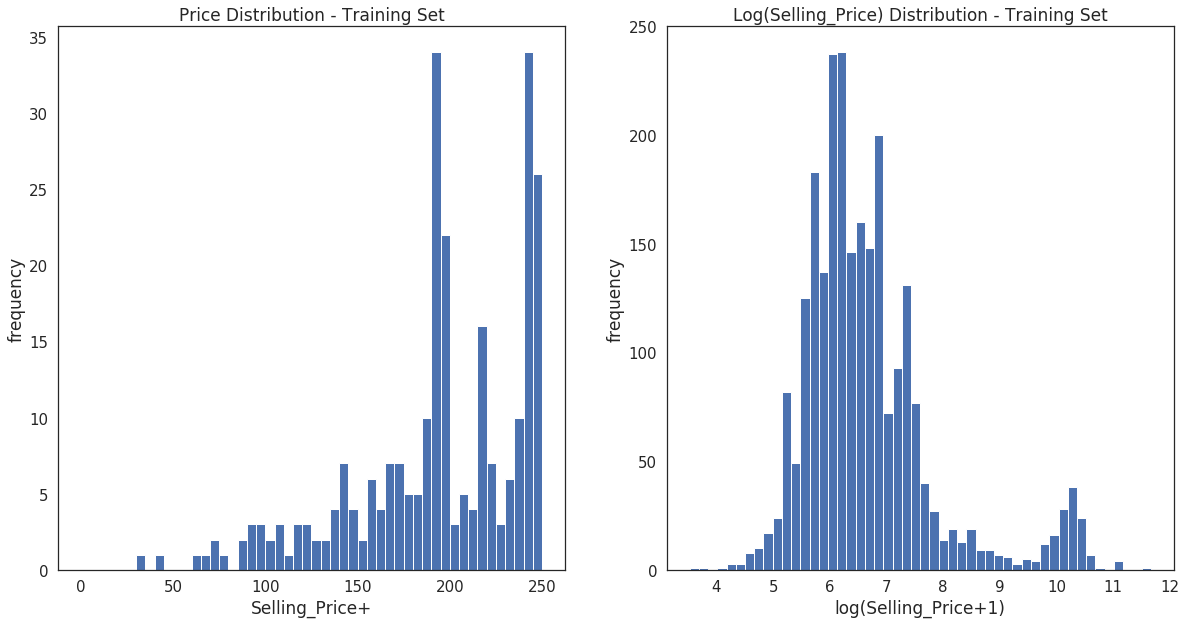

In [9]:
plt.subplot(1, 2, 1)
(df['Selling_Price']).plot.hist(bins=50, figsize=(20,10), edgecolor='white',range=[0,250])
plt.xlabel('Selling_Price+', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Price Distribution - Training Set', fontsize=17)

plt.subplot(1, 2, 2)
np.log(df['Selling_Price']+1).plot.hist(bins=50, figsize=(20,10), edgecolor='white')
plt.xlabel('log(Selling_Price+1)', fontsize=17)
plt.ylabel('frequency', fontsize=17)
plt.tick_params(labelsize=15)
plt.title('Log(Selling_Price) Distribution - Training Set', fontsize=17)
plt.show()

In [10]:
print("There are %d unique values in the category column." % df['Item_Category'].nunique())

There are 75 unique values in the category column.


In [11]:
# TOP 18  CATEGORIES
df['Item_Category'].value_counts()[:18]

clothing                    717
jewellery                   428
automotive                  188
footwear                    161
computers                   104
home decor festive needs     98
kitchen dining               97
beauty and personal care     90
home furnishing              82
mobiles accessories          76
watches                      65
baby care                    48
toys school supplies         42
tools hardware               38
bags wallets belts           38
pens stationery              33
furniture                    31
sports fitness               24
Name: Item_Category, dtype: int64

In [12]:
print("There are %d unique values in the category column." % df['Subcategory_1'].nunique())

There are 130 unique values in the category column.


In [13]:
print("There are %d unique values in the category column." % df['Subcategory_2'].nunique())

There are 336 unique values in the category column.


In [14]:
df['Product'].nunique() #all products are different its product id basically but may be useful

2452

In [15]:
df['Product_Brand'].nunique()

1010

In [16]:
df.groupby(['Product_Brand','Subcategory_1']).mean().head(10) # average item rating and price for a product brand 

Item_Rating  Selling_Price
Product_Brand Subcategory_1                                      
B-1           accessories spare parts     2.942857    1752.285714
B-1000        women s clothing            3.700000     616.000000
B-1004        earrings                    3.000000     296.000000
              necklaces chains            3.800000     372.000000
              rings                       4.500000     589.000000
              unknown                     2.100000     391.000000
B-1008        lighting                    2.600000     394.000000
B-1009        men s clothing              2.900000     896.000000
B-101         lawn gardening              3.350000      71.000000
B-1016        laptop accessories          2.200000     107.000000

In [17]:
sf.groupby(['Product_Brand','Subcategory_1']).mean().head() # average item rating and price for a product brand 

,,Item_Rating
Product_Brand,Subcategory_1,
B-1,accessories spare parts,3.7
B-1004,bed linen,1.0
B-1011,laptop accessories,1.3
B-1015,necklaces chains,4.6
B-1018,infant wear,2.8


In [18]:
df[df['Product_Brand'] == 'B-1']

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
112,P-15,B-1,automotive,accessories spare parts,car interior exterior,1.8,1/12/2015,1486.0
478,P-11,B-1,automotive,accessories spare parts,car interior exterior,3.0,1/12/2016,1451.0
886,P-27,B-1,automotive,accessories spare parts,car interior exterior,2.6,1/12/2016,1489.0
1224,P-21,B-1,automotive,accessories spare parts,car interior exterior,4.2,1/12/2012,2750.0
1298,P-47,B-1,automotive,accessories spare parts,car interior exterior,2.8,1/12/2016,1746.0
1338,P-32,B-1,automotive,accessories spare parts,car interior exterior,2.6,1/12/2018,1889.0
2021,P-35,B-1,automotive,accessories spare parts,car interior exterior,3.6,1/12/2018,1455.0


In [19]:
sf[sf['Product_Brand'] == 'B-1']

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date
324,P-37,B-1,automotive,accessories spare parts,car interior exterior,3.7,1/12/2015


 how model will differentiate here  using product , rating and maybe date (date may infer wrong things)

In [20]:
#checking data for sanity for safe groupby and label encoding 

In [21]:
object_cols = [col for col in df.columns if df[col].dtype == "object"]

# Columns that can be safely label encoded
good_label_cols = [col for col in object_cols if 
                   set(df[col]) == set(sf[col])]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))
        
print('good columns', good_label_cols)
print('\n bad columns:', bad_label_cols)


good columns []

 bad columns: ['Product_Brand', 'Subcategory_2', 'Product', 'Date', 'Item_Category', 'Subcategory_1']


In [22]:
set(df['Item_Category'])

{'adidas ind pro thi gua thigh guard white blue',
 'anuradha art stylish hair clip black',
 'arial morris women flats',
 'automation robotics',
 'automotive',
 'autoplus m ap15 arm sleeve black',
 'baby care',
 'bags wallets belts',
 'beauty and personal care',
 'cameras accessories',
 'clothing',
 'clovia women s t shirt bra',
 'coirfit single coir mattress',
 'computers',
 'd d women flats',
 'dassler slim fit women s multicolor jeans',
 'e hiose girl s leggings pack of 6',
 'ebooks',
 'eyewear',
 'fabpoppy printed women s jumpsuit',
 'favourite bikerz 3514 rad air filter ionic air f',
 'feet flow women flats',
 'fly u slim fit fit women s brown jeans',
 'food nutrition',
 'footwear',
 'frabjous german silver rings for women alloy zir',
 'furniture',
 'gaming',
 'health personal care appliances',
 'home decor festive needs',
 'home entertainment',
 'home furnishing',
 'home improvement',
 'home kitchen',
 'jewellery',
 'kalpaveda copper bowl gold pack of 1',
 'killys men s solid no s

In [23]:
set(sf['Item_Category'])

{'amita home furnishing cotton printed single beds',
 'asics gel kayano 22 running shoes',
 'automotive',
 'baby care',
 'bags wallets belts',
 'balaji exports bottled wine cooler 9 bottles',
 'be 13 printed boy s round neck t shirt pack of 2',
 'beauty and personal care',
 'bootwale bellies',
 'cameras accessories',
 'camey men s quarter length socks',
 'clickforsign avoid contanimation wash your hands',
 'clothing',
 'computers',
 'dressberry black synthetic clutch',
 'easies solid single breasted casual men s blazer',
 'eyewear',
 'footwear',
 'furniture',
 'gaming',
 'health personal care appliances',
 'home decor festive needs',
 'home entertainment',
 'home furnishing',
 'home improvement',
 'home kitchen',
 'indistar self design viscose women s stole',
 'jewellery',
 'kitchen dining',
 'kittens boys flats',
 'kombee girl s printed red pink top capri set',
 'mobiles accessories',
 'naaz 2 in 1 paper quilling board game',
 'olvin rectangular sunglasses',
 'olvin wayfarer sunglasse

In [24]:
# there are many values are new in test 

In [25]:
set(df['Subcategory_1'])

{'academic texts',
 'accessories',
 'accessories spare parts',
 'action figures',
 'art supplies',
 'audio players',
 'baby bath skin',
 'baby bedding',
 'baby grooming',
 'baby kids gifts',
 'bags',
 'bangles bracelets armlets',
 'bar glassware',
 'bath and spa',
 'bath linen',
 'bed linen',
 'bedroom furniture',
 'body and skin care',
 'camera accessories',
 'candles fragrances',
 'car bike accessories',
 'coffee mugs',
 'college supplies',
 'combos and kits',
 'computer components',
 'computer peripherals',
 'consumables disposables',
 'containers bottles',
 'cookware',
 'curtains accessories',
 'cushions pillows covers',
 'damemoda wayfarer sunglasses',
 'decorative lighting lamps',
 'diapering potty training',
 'dinnerware crockery',
 'earrings',
 'electricals',
 'eye care',
 'eye glass wayfarer sunglasses',
 'feeding nursing',
 'festive decor',
 'fitness accessories',
 'floor coverings',
 'flowers plants vases',
 'fragrances',
 'frames',
 'furniture furnishings',
 'gaming accesso

In [26]:
#counts

In [27]:
df.groupby(['Subcategory_1','Subcategory_2']).mean()

Item_Rating  Selling_Price
Subcategory_1  Subcategory_2                                    
academic texts humanities                4.000000    7227.000000
               language learning         5.000000     425.000000
               law                       1.700000    1563.000000
               medical                   2.400000    7523.000000
accessories    brooches                  2.688889     511.500000
...                                           ...            ...
wrist watches  skmei wrist watches       4.400000    1170.000000
               sonata wrist watches      3.633333     909.333333
               texus wrist watches       4.200000     354.000000
               timewel wrist watches     2.825000     809.500000
               timex wrist watches       3.700000    3121.000000

[369 rows x 2 columns]

In [28]:
set(sf['Subcategory_1']) - set(df['Subcategory_1'])   #these 12 subcategories_1 are not in training dataset

{'aligatorr aviator sunglasses',
 'car accessories',
 'educational toys',
 'hardware',
 'indoor sports games',
 'laptops',
 'naaz toys school supplies',
 'soft toys',
 'storage',
 'storage feeding utensils',
 'suspenders',
 'true home decor festive needs'}

In [29]:
len(set(sf['Subcategory_2']) - set(df['Subcategory_2']))   #these 59 subcategories_2 are not in training dataset

59

In [30]:
len(set(sf['Item_Category']) - set(df['Item_Category'])) 

20

In [31]:
len(set(sf['Product_Brand']) - set(df['Product_Brand'])) 

303

In [32]:
len(set(sf['Product']) - set(df['Product'])) # it means not a single product ID is repeated 

1051

In [5]:
len(sf['Product'])

1051

In [33]:
#date

In [34]:
sf['Date'].nunique()
df['Date'].nunique()

483

In [35]:
len(set(sf['Date']) - set(df['Date'])) # it means not a single product ID is repeated 

80

In [36]:
df.groupby(['Date','Subcategory_1']).agg(['mean','median','count'])

Item_Rating              Selling_Price  \
                                          mean median count          mean   
Date     Subcategory_1                                                      
1/1/2013 bags                             2.90    2.9     1         246.0   
         bed linen                        3.86    4.0     5         960.4   
         decorative lighting lamps        2.00    2.0     1         850.0   
         makeup                           4.50    4.5     1         177.0   
         office supplies                  3.50    3.5     1         244.0   
...                                        ...    ...   ...           ...   
9/6/2014 car bike accessories             3.10    3.1     1         993.0   
9/6/2015 car bike accessories             2.20    2.2     1         996.0   
9/6/2017 general utility furniture        4.60    4.6     1         791.0   
         role play toys                   1.70    1.7     1         292.0   
         toy guns weapons                 3.90    3.9     1         276.0   

                                                 
                                   median count  
Date     Subcategory_1                           
1/1/2013 bags                       246.0     1  
         bed linen                  830.0     5  
         decorative lighting lamps  850.0     1  
         makeup                     177.0     1  
         office supplies            244.0     1  
...                                   ...   ...  
9/6/2014 car bike accessories       993.0     1  
9/6/2015 car bike accessories       996.0     1  
9/6/2017 general utility furniture  791.0     1  
         role play toys             292.0     1  
         toy guns weapons           276.0     1  

[1195 rows x 6 columns]

In [37]:
sf.groupby(['Date','Subcategory_1']).agg(['mean','median','count']) #not much resemblence 

Item_Rating             
                                     mean median count
Date     Subcategory_1                                
1/1/2013 bed linen               2.433333   1.40     3
         rings                   2.240000   2.30     5
1/1/2014 bags                    1.800000   1.80     1
         bed linen               2.250000   2.25     2
         indoor sports games     4.600000   4.60     1
...                                   ...    ...   ...
9/4/2018 unknown                 3.900000   3.90     1
9/5/2016 unknown                 4.300000   4.30     1
9/6/2016 women s clothing        4.000000   4.00     1
9/6/2017 kitchen dining linen    3.900000   3.90     1
9/6/2019 women s clothing        4.500000   4.50     1

[656 rows x 3 columns]

In [38]:
df['Istrain'] = 1
sf['Istrain'] = 0

sf['Selling_Price'] = -1
total = pd.concat([df,sf], axis=0)

In [39]:
total

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,Istrain
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.3,2/3/2017,291.0,1
1,P-2453,B-3078,clothing,women s clothing,western wear,3.1,7/1/2015,897.0,1
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.5,1/12/2019,792.0,1
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.0,12/12/2014,837.0,1
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.3,12/12/2013,470.0,1
...,...,...,...,...,...,...,...,...,...
1046,P-9758,B-2543,sports fitness,outdoor adventure,camping hiking,2.0,28/2/2014,-1.0,0
1047,P-11898,B-3197,jewellery,necklaces chains,necklaces,4.7,1/12/2019,-1.0,0
1048,P-904,B-133,automotive,accessories spare parts,car interior exterior,3.5,1/12/2014,-1.0,0
1049,P-1714,B-358,kitchen dining,lighting,bulbs,2.4,23/6/2013,-1.0,0


In [40]:
total['Product'] = total['Product'].str.replace(r'\D', '')

total['Product'] = pd.to_numeric(total['Product'], errors='coerce')

total['Product_Brand'] = total['Product_Brand'].str.replace(r'\D', '')

total['Product_Brand'] = pd.to_numeric(total['Product_Brand'], errors='coerce')

In [41]:
total.isnull().sum()

Product          0
Product_Brand    0
Item_Category    0
Subcategory_1    0
Subcategory_2    0
Item_Rating      0
Date             0
Selling_Price    0
Istrain          0
dtype: int64

In [42]:
total[total['Product_Brand']==1]

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,Istrain
112,15,1,automotive,accessories spare parts,car interior exterior,1.8,1/12/2015,1486.0,1
478,11,1,automotive,accessories spare parts,car interior exterior,3.0,1/12/2016,1451.0,1
886,27,1,automotive,accessories spare parts,car interior exterior,2.6,1/12/2016,1489.0,1
1224,21,1,automotive,accessories spare parts,car interior exterior,4.2,1/12/2012,2750.0,1
1298,47,1,automotive,accessories spare parts,car interior exterior,2.8,1/12/2016,1746.0,1
1338,32,1,automotive,accessories spare parts,car interior exterior,2.6,1/12/2018,1889.0,1
2021,35,1,automotive,accessories spare parts,car interior exterior,3.6,1/12/2018,1455.0,1
324,37,1,automotive,accessories spare parts,car interior exterior,3.7,1/12/2015,-1.0,0


In [43]:
total.sort_values('Product').head(20)

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,Istrain
809,5,3078,footwear,women s footwear,wedges,4.6,29/12/2013,499.0,1
2152,8,3078,footwear,men s footwear,formal shoes,2.4,29/12/2013,546.0,1
478,11,1,automotive,accessories spare parts,car interior exterior,3.0,1/12/2016,1451.0,1
112,15,1,automotive,accessories spare parts,car interior exterior,1.8,1/12/2015,1486.0,1
1224,21,1,automotive,accessories spare parts,car interior exterior,4.2,1/12/2012,2750.0,1
886,27,1,automotive,accessories spare parts,car interior exterior,2.6,1/12/2016,1489.0,1
1338,32,1,automotive,accessories spare parts,car interior exterior,2.6,1/12/2018,1889.0,1
2021,35,1,automotive,accessories spare parts,car interior exterior,3.6,1/12/2018,1455.0,1
324,37,1,automotive,accessories spare parts,car interior exterior,3.7,1/12/2015,-1.0,0
1298,47,1,automotive,accessories spare parts,car interior exterior,2.8,1/12/2016,1746.0,1


In [44]:
from dateutil.relativedelta import relativedelta
from datetime import datetime, timedelta
import re
from fastai.tabular import add_datepart

In [45]:
total['Date'] = pd.to_datetime(total['Date'] ,errors='coerce')

In [46]:
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    
#     for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
#             'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
    
    for n in ('Year', 'Month', 'Week', 'Day','Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [47]:
total['Date'].unique()

array(['2017-02-03T00:00:00.000000000', '2015-07-01T00:00:00.000000000', '2019-01-12T00:00:00.000000000',
       '2014-12-12T00:00:00.000000000', ..., '2015-12-05T00:00:00.000000000', '2013-03-21T00:00:00.000000000',
       '2015-05-13T00:00:00.000000000', '2016-03-20T00:00:00.000000000'], dtype='datetime64[ns]')

In [48]:
#grace holidays and holiday

In [49]:
import holidays
time = pd.DataFrame()

In [50]:
in_graceholiday=[]
for holiday in holidays.IND(years=[2013,2014,2015,2016,2017,2018,2019]).items():
    in_graceholiday.append(holiday[0])

In [51]:
graceondate=[]
for i in in_graceholiday:
    twodayago = i - timedelta(days = 3)
    twodayafter = i + timedelta(days = 3)
    for date in pd.date_range(twodayago,twodayafter):
        graceondate.append((str(date).split()[0]))

In [52]:
in_graceperiod = list(set(graceondate))

In [53]:
total['HolidayGrace']= [ 1 if str(val).split()[0] in in_graceperiod else 0 for val in total['Date']]

In [54]:
add_datepart(total, 'Date',drop = True)

In [55]:
total

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Selling_Price,Istrain,HolidayGrace,Year,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,2610,659,bags wallets belts,bags,hand bags,4.3,291.0,1,0,2017,...,3,4,34,False,False,False,False,False,False,1486080000
1,2453,3078,clothing,women s clothing,western wear,3.1,897.0,1,0,2015,...,1,2,182,False,True,False,True,False,False,1435708800
2,6802,1810,home decor festive needs,showpieces,ethnic,3.5,792.0,1,1,2019,...,12,5,12,False,False,False,False,False,False,1547251200
3,4452,3078,beauty and personal care,eye care,h2o plus eye care,4.0,837.0,1,0,2014,...,12,4,346,False,False,False,False,False,False,1418342400
4,8454,3078,clothing,men s clothing,t shirts,4.3,470.0,1,0,2013,...,12,3,346,False,False,False,False,False,False,1386806400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,9758,2543,sports fitness,outdoor adventure,camping hiking,2.0,-1.0,0,0,2014,...,28,4,59,True,False,False,False,False,False,1393545600
1047,11898,3197,jewellery,necklaces chains,necklaces,4.7,-1.0,0,1,2019,...,12,5,12,False,False,False,False,False,False,1547251200
1048,904,133,automotive,accessories spare parts,car interior exterior,3.5,-1.0,0,1,2014,...,12,6,12,False,False,False,False,False,False,1389484800
1049,1714,358,kitchen dining,lighting,bulbs,2.4,-1.0,0,0,2013,...,23,6,174,False,False,False,False,False,False,1371945600


In [56]:
train = total[total['Istrain']==1]
test = total[total['Istrain']==0]

In [57]:
train = train.drop('Istrain' , axis =1)
test = test.drop(['Istrain', 'Selling_Price'] , axis =1)

In [58]:
from pycaret.regression import *

In [59]:
obj = setup(train, target = "Selling_Price", session_id=123,transform_target=True,normalize = True,
            transformation = True)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,True
2,Transform Target Method,box-cox
3,Original Data,"(2452, 21)"
4,Missing Values,False
5,Numeric Features,7
6,Categorical Features,12
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [60]:
blacklist = ['dt','lar','par','knn','kr','en','lr','llar','tr','ransac','svm','lasso']

In [61]:
compare_models(blacklist =blacklist,sort = 'RMSLE',fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest,1064.315700,20681085.869100,4227.262800,0.641900,0.720600,0.519600
1,Bayesian Ridge,1302.612400,26357503.376500,4904.132200,0.521800,0.740000,0.567700
2,Ridge Regression,1299.878000,30199254.130200,5209.492000,0.417500,0.740500,0.575100
3,CatBoost Regressor,1240.816400,27803995.471500,4986.238000,0.509400,0.743400,0.518300
4,Extreme Gradient Boosting,1407.522100,30771214.885100,5303.385500,0.444400,0.762600,0.543400
5,Gradient Boosting Regressor,1425.503100,31115969.523400,5345.286200,0.435600,0.762900,0.542500
6,Extra Trees Regressor,1081.442000,24701646.070600,4503.984700,0.519900,0.767800,0.804700
7,Orthogonal Matching Pursuit,1288.562000,21572613.903700,4411.004200,0.603400,0.769100,0.647300
8,Light Gradient Boosting Machine,1333.181800,31178221.131800,5312.792800,0.437500,0.774800,0.567300
9,Huber Regressor,1059.652200,17112012.022300,3874.809500,0.678000,0.798400,0.670900


In [62]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,651.2493,2.360490e+06,1536.3886,0.9155,0.6245,0.5163
1,2020.1788,1.032218e+08,10159.8146,0.1622,0.8683,0.5338
2,1323.7897,1.894630e+07,4352.7349,0.7389,0.6883,0.4514
3,575.8367,5.005951e+06,2237.3984,0.5072,0.5708,0.4808
4,1034.8884,1.992591e+07,4463.8446,0.7025,0.6778,0.5282
5,1068.7501,1.550993e+07,3938.2645,0.7907,0.6271,0.5546
6,1005.5302,1.209179e+07,3477.3252,0.7221,0.6860,0.5265
7,963.8662,8.515829e+06,2918.1893,0.7901,0.7526,0.4502
8,1063.4569,9.458255e+06,3075.4275,0.5086,0.9152,0.5871
9,607.0185,4.093271e+06,2023.1834,0.8673,0.6016,0.4519


In [63]:
ridge = create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,740.8981,4.083177e+06,2020.6874,0.8539,0.6566,0.5509
1,1957.8335,1.014604e+08,10072.7547,0.1765,0.8731,0.5697
2,1983.6913,5.047531e+07,7104.5980,0.3045,0.7437,0.5618
3,612.4606,4.693495e+06,2166.4475,0.5379,0.5987,0.5147
4,1188.9931,1.232582e+07,3510.8145,0.8160,0.7102,0.5770
5,1470.2955,2.526071e+07,5026.0031,0.6591,0.6698,0.5894
6,1262.7230,1.334347e+07,3652.8710,0.6934,0.6568,0.5854
7,1228.0197,1.098598e+07,3314.5111,0.7293,0.7394,0.5505
8,1178.3914,1.081105e+07,3288.0156,0.4383,0.9225,0.6467
9,912.5888,8.980399e+06,2996.7313,0.7089,0.6799,0.5521


In [64]:
ridgbr = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,771.6156,4.574637e+06,2138.8400,0.8363,0.6527,0.5454
1,2004.4104,1.044515e+08,10220.1514,0.1522,0.8720,0.5582
2,1810.6387,3.498867e+07,5915.1224,0.5179,0.7418,0.5444
3,611.7707,4.787080e+06,2187.9397,0.5287,0.5980,0.5117
4,1347.3729,2.123046e+07,4607.6521,0.6830,0.7129,0.5719
5,1561.0694,2.988629e+07,5466.8359,0.5967,0.6755,0.5972
6,1304.0765,1.454839e+07,3814.2350,0.6657,0.6541,0.5724
7,1274.5078,1.208171e+07,3475.8752,0.7023,0.7463,0.5443
8,1180.7774,1.086433e+07,3296.1088,0.4355,0.9226,0.6460
9,919.0152,9.455014e+06,3074.9007,0.6936,0.6765,0.5417


In [65]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,750.9270,3.962036e+06,1990.4863,0.8582,0.6165,0.4873
1,2062.3092,1.085999e+08,10421.1272,0.1185,0.8933,0.5267
2,1588.7213,3.378009e+07,5812.0645,0.5345,0.7342,0.4583
3,602.7491,5.648438e+06,2376.6444,0.4439,0.5655,0.4642
4,1426.7715,3.759597e+07,6131.5550,0.4387,0.7305,0.5353
5,1553.6271,3.620169e+07,6016.7838,0.5115,0.6978,0.6022
6,1302.8147,1.763148e+07,4198.9862,0.5949,0.6848,0.4957
7,1027.4373,8.975678e+06,2995.9437,0.7788,0.7572,0.4809
8,1151.9758,1.048884e+07,3238.6474,0.4550,0.9321,0.5875
9,717.7601,5.214249e+06,2283.4729,0.8310,0.6159,0.4849


In [66]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,703.0265,2.672859e+06,1634.8882,0.9043,0.7089,0.5948
1,1873.5137,9.391631e+07,9691.0428,0.2377,0.8695,0.5800
2,1140.3889,9.775735e+06,3126.6172,0.8653,0.7414,0.5904
3,638.2585,4.871460e+06,2207.1384,0.5204,0.6226,0.5864
4,851.0408,7.924928e+06,2815.1249,0.8817,0.6585,0.5162
5,943.5720,7.446130e+06,2728.7598,0.8995,0.6472,0.5930
6,1174.6876,1.305343e+07,3612.9533,0.7001,0.7996,0.6899
7,1227.8828,1.498069e+07,3870.4900,0.6308,0.8577,1.0726
8,1017.4211,7.852709e+06,2802.2685,0.5920,0.8947,0.6329
9,682.4671,4.724853e+06,2173.6727,0.8469,0.6412,0.5232


In [67]:
tuned_ridge = tune_model('ridge') #useless

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,736.7277,3.991738e+06,1997.9335,0.8571,0.6574,0.5523
1,1949.8426,1.009600e+08,10047.8876,0.1805,0.8734,0.5722
2,2047.3670,6.008179e+07,7751.2445,0.1721,0.7451,0.5668
3,613.2970,4.684528e+06,2164.3770,0.5388,0.5987,0.5154
4,1158.3492,1.116346e+07,3341.1768,0.8333,0.7103,0.5782
5,1453.5760,2.447098e+07,4946.8155,0.6698,0.6690,0.5882
6,1256.4822,1.316023e+07,3627.7031,0.6976,0.6575,0.5881
7,1221.1397,1.083277e+07,3291.3176,0.7330,0.7387,0.5518
8,1178.0767,1.080802e+07,3287.5556,0.4385,0.9225,0.6469
9,911.6052,8.905688e+06,2984.2399,0.7114,0.6805,0.5540


In [68]:
tuned_ridge_br = tune_model('br') #useit

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,772.2506,4.580227e+06,2140.1465,0.8361,0.6526,0.5454
1,2004.8990,1.044919e+08,10222.1266,0.1519,0.8718,0.5581
2,1808.7630,3.493518e+07,5910.5991,0.5186,0.7419,0.5441
3,611.5937,4.792401e+06,2189.1553,0.5282,0.5978,0.5114
4,1349.0674,2.136329e+07,4622.0442,0.6810,0.7130,0.5720
5,1562.0001,2.995638e+07,5473.2423,0.5957,0.6755,0.5974
6,1305.0640,1.457566e+07,3817.8088,0.6651,0.6542,0.5723
7,1275.0615,1.209479e+07,3477.7570,0.7019,0.7465,0.5444
8,1180.9341,1.086598e+07,3296.3591,0.4354,0.9226,0.6462
9,918.9681,9.456519e+06,3075.1453,0.6935,0.6765,0.5415


In [69]:
tuned_rf = tune_model('rf') #useless

IntProgress(value=0, description='Processing: ', max=16)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:59:04
Status,. . . . . . . . . . . . . . . . . .,Fitting Meta Model Fold 10 of 10
ETC,. . . . . . . . . . . . . . . . . .,0.0 Seconds Remaining


,MAE,MSE,RMSE,R2,RMSLE,MAPE


KeyboardInterrupt: 

In [ ]:
tuned_catboost = tune_model('catboost') #useless

In [70]:
tuned_et = tune_model('et') #usefull

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,604.2655,2.061237e+06,1435.7009,0.9262,0.6110,0.4745
1,2007.4376,1.023886e+08,10118.7251,0.1689,0.8654,0.5279
2,1359.7834,2.221708e+07,4713.5000,0.6939,0.6821,0.4672
3,539.9968,4.196152e+06,2048.4510,0.5869,0.5444,0.4631
4,1023.9440,1.833406e+07,4281.8293,0.7263,0.6682,0.4934
5,1080.9093,1.488263e+07,3857.8010,0.7992,0.6353,0.5458
6,1002.5895,1.120675e+07,3347.6482,0.7425,0.6735,0.5321
7,938.5363,8.116257e+06,2848.9045,0.8000,0.7331,0.4634
8,1056.4171,9.360167e+06,3059.4390,0.5137,0.8760,0.5647
9,615.5089,4.312245e+06,2076.5945,0.8602,0.6104,0.4638


In [71]:
blend_specific1 = blend_models(estimator_list = [ridge,rf,catboost,tuned_et,tuned_ridge_br] ,fold =5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1300.7390,5.321918e+07,7295.1476,0.2983,0.7522,0.5039
1,1093.0839,1.689907e+07,4110.8473,0.6027,0.6427,0.4761
2,1385.7092,3.041079e+07,5514.5980,0.5700,0.6802,0.5571
3,1150.6944,1.147606e+07,3387.6333,0.7265,0.7006,0.4928
4,911.0354,7.643752e+06,2764.7336,0.6942,0.7907,0.5381
Mean,1168.2524,2.392977e+07,4614.5920,0.5783,0.7133,0.5136
SD,165.5049,1.655073e+07,1623.3639,0.1513,0.0524,0.0297


In [72]:
blend_specific2 = blend_models(estimator_list = [ridge,rf,catboost] ,fold =5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1318.3104,5.339516e+07,7307.1991,0.2959,0.7556,0.5086
1,1102.3196,1.724753e+07,4153.0152,0.5945,0.6463,0.4739
2,1414.8328,3.222475e+07,5676.6844,0.5443,0.6861,0.5625
3,1130.9881,1.148446e+07,3388.8729,0.7263,0.7047,0.4848
4,913.0610,7.575601e+06,2752.3810,0.6969,0.7934,0.5372
Mean,1175.9024,2.438550e+07,4655.6305,0.5716,0.7172,0.5134
SD,175.4338,1.675097e+07,1646.3914,0.1529,0.0518,0.0328


In [73]:
blend_specific3 = blend_models(estimator_list = [rf,catboost,tuned_et,tuned_ridge_br] ,fold =5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1316.3526,5.350039e+07,7314.3960,0.2945,0.7519,0.5016
1,1088.1435,1.703360e+07,4127.1786,0.5995,0.6416,0.4686
2,1361.3539,3.085332e+07,5554.5767,0.5637,0.6798,0.5527
3,1101.2352,1.108410e+07,3329.2795,0.7358,0.7037,0.4829
4,895.4639,7.423356e+06,2724.5836,0.7030,0.7866,0.5303
Mean,1152.5098,2.397895e+07,4610.0029,0.5793,0.7127,0.5072
SD,169.2956,1.677722e+07,1651.3109,0.1559,0.0514,0.0307


In [74]:
blend_specific4 = blend_models(estimator_list = [rf,catboost,tuned_et] ,fold =5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1340.4675,5.389054e+07,7341.0177,0.2894,0.7552,0.5030
1,1057.0157,1.651980e+07,4064.4563,0.6116,0.6418,0.4612
2,1319.5911,3.060724e+07,5532.3807,0.5672,0.6795,0.5494
3,1040.9436,1.054140e+07,3246.7521,0.7487,0.7133,0.4753
4,865.3459,7.041994e+06,2653.6755,0.7182,0.7834,0.5220
Mean,1124.6727,2.372020e+07,4567.6565,0.5870,0.7147,0.5021
SD,180.7755,1.709602e+07,1690.1803,0.1631,0.0508,0.0317


In [92]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [75]:
stack_1 = stack_models([rf,tuned_et,ridge], meta_model = rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,571.0919,1.667148e+06,1291.1809,0.9403,0.5943,0.4631
1,1788.7369,9.230398e+07,9607.4961,0.2508,0.8688,0.5135
2,1118.0150,1.066008e+07,3264.9772,0.8531,0.6828,0.4598
3,473.4243,2.464676e+06,1569.9286,0.7574,0.5259,0.4210
4,864.4720,6.236531e+06,2497.3048,0.9069,0.6506,0.4883
5,772.0533,5.933363e+06,2435.8495,0.9199,0.6329,0.5440
6,1047.0753,1.302197e+07,3608.5970,0.7008,0.7090,0.5149
7,943.3162,8.017070e+06,2831.4431,0.8024,0.7480,0.4638
8,1088.2021,9.903086e+06,3146.9169,0.4855,0.9175,0.6552
9,663.6257,6.275078e+06,2505.0106,0.7966,0.6332,0.4966


In [76]:
stack_2 = stack_models([rf,catboost,ridge], meta_model = tuned_et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,586.3433,1.928244e+06,1388.6121,0.9310,0.5935,0.4703
1,1909.2250,9.666294e+07,9831.7315,0.2154,0.8491,0.5025
2,1199.0748,1.428870e+07,3780.0401,0.8031,0.6741,0.4516
3,480.9035,2.792889e+06,1671.1939,0.7251,0.5247,0.4214
4,1077.6383,2.174265e+07,4662.9017,0.6754,0.6560,0.4967
5,1033.6747,1.290459e+07,3592.2954,0.8258,0.6412,0.5751
6,965.8029,1.162651e+07,3409.7662,0.7328,0.6716,0.4924
7,912.9650,7.919342e+06,2814.1326,0.8048,0.7425,0.4412
8,1053.0117,9.470903e+06,3077.4833,0.5079,0.9141,0.5658
9,592.6156,4.112370e+06,2027.8980,0.8667,0.5966,0.4476


In [ ]:
# stack_3 = stack_models([rf,tuned_et,catboost], meta_model = rf)

In [ ]:
stack_4 = stack_models([rf,tuned_et,ridge,catboost], meta_model = rf)

In [ ]:
# stack_4 = stack_models([rf,tuned_et,ridge,catboost], meta_model = catboost)

In [ ]:
# stacknet1 = create_stacknet(estimator_list =[[rf,tuned_et,tuned_ridge_br],[ridge,catboost,tuned_et]])

In [77]:
final = finalize_model(stack_2)

In [78]:
final2 = finalize_model(blend_specific1)

In [79]:
new_prediction = predict_model(final, data=test, round = 0)
new_prediction.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,HolidayGrace,Year,Month,Week,...,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,Label
0,11284,2984,computers,network components,routers,4.3,1,2018,1,2,...,4,12,False,False,False,False,False,False,1515715200,2359.0
1,6580,1732,jewellery,bangles bracelets armlets,bracelets,3.0,0,2012,12,51,...,3,355,False,False,False,False,False,False,1355961600,353.0
2,5843,3078,clothing,women s clothing,western wear,1.5,1,2014,1,2,...,6,12,False,False,False,False,False,False,1389484800,820.0
3,5334,1421,jewellery,necklaces chains,necklaces,3.9,1,2019,1,2,...,5,12,False,False,False,False,False,False,1547251200,361.0
4,5586,3078,clothing,women s clothing,western wear,1.4,1,2017,1,2,...,3,12,False,False,False,False,False,False,1484179200,815.0


In [80]:
new_prediction2 = predict_model(final2, data=test, round = 0)
new_prediction2.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,HolidayGrace,Year,Month,Week,...,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,Label
0,11284,2984,computers,network components,routers,4.3,1,2018,1,2,...,4,12,False,False,False,False,False,False,1515715200,2331.0
1,6580,1732,jewellery,bangles bracelets armlets,bracelets,3.0,0,2012,12,51,...,3,355,False,False,False,False,False,False,1355961600,378.0
2,5843,3078,clothing,women s clothing,western wear,1.5,1,2014,1,2,...,6,12,False,False,False,False,False,False,1389484800,712.0
3,5334,1421,jewellery,necklaces chains,necklaces,3.9,1,2019,1,2,...,5,12,False,False,False,False,False,False,1547251200,348.0
4,5586,3078,clothing,women s clothing,western wear,1.4,1,2017,1,2,...,3,12,False,False,False,False,False,False,1484179200,721.0


In [81]:
sub = pd.read_excel('../MachineHackE-Commerce/Sample_Submission.xlsx')

In [84]:
sub['Price'] = (new_prediction2['Label'])

In [85]:
sub.to_excel('casualpycaret4.xlsx')